# Titanic passengers analysis
The purpose of this project is to investigate the Titanic passengers data set and to understand which factors contributed to death or survival of passengers.


In [2]:
from matplotlib import pyplot as plt
import seaborn
import numpy as np
import pandas as pd
import titanicutils as tu
%matplotlib inline

## Data wrangling
Let's import CSV file with passengers data and get understanding of it. First let's take a look at the beginning of data set.

In [3]:
passengers = pd.read_csv('data/titanic-data.csv')
rows_number = len(passengers.index)
print(f'The size of data set is {rows_number} rows.')
passengers.head()

The size of data set is 891 rows.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There were more than 2000 passengers onboard Titanic, but we have only 891 rows in our data set, meaning we're working with a sample and not with entire population of passengers.

### Analysing NaN values
It's clear that some of the columns contain _NaN_ in some rows. Let's try to understand how many of the columns need additional filtration. 

In [4]:
nans_by_column = tu.nans_count_by_column(passengers)
nans_by_column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,177,0,0,0,0,687,2


_Age_, _Cabin_ and _Embarked_ columns contain NaN values. Let's transform these values to percentage:

In [5]:
nans_percent_by_column = nans_by_column[['Age', 'Cabin', 'Embarked']]\
    .applymap(lambda nans_count: round(float(nans_count) / rows_number * 100, 2))
nans_percent_by_column

,Age,Cabin,Embarked
0,19.87,77.1,0.22


* _Age_ column is only 80% full. We should be careful with our conclusions based on passenger ages and treat the data set as a sample, because absense of so many data could potentialy skew the results.
* _Cabin_ column is almost empty - less than 23 percent of values in it contain data. Probably we won't be able to use it in our considerations. 
* _Embarked_ column is almost fully set. Later, if we decide to use it for analysis, we could filter the data set by removing all the rows with _Embarked_ value not set. Hopefuly this won't affect the global picture, because the value of rows with _Embarked_ value ommitted is negligent, but anyways, we should treat the dataset with filtered by _Embarked_ column as a sample.

## Analysis of data types
Let's take a look at the data types of our data set:

In [6]:
passengers.dtypes.to_frame().transpose()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


It looks like all the columns that should contain numerical data were parsed correctly. 
Now let's take a closer look at _Sex_ column. We expect it to contain two types of values _female_ and _male_. Let's check this column:

In [7]:
passengers['Sex'].unique()

array(['male', 'female'], dtype=object)

Indeed, the values in _Sex_ column are of correct type.

## Analysis of survival based on ticket class

Let's try to understand if ticket class has anything to do with survival rate. One can assume that higher ticket class represents passengers from higher levels of society.
Let's check our assumption by looking at how ticket prices are correlated with ticket class.


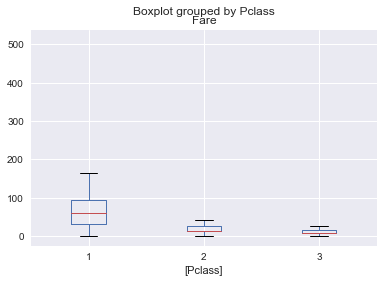

In [9]:
fares_and_class = passengers[['Fare', 'Pclass']]
fares_and_class.boxplot(by='Pclass')

Box plots above show the fares grouped by ticket class. Though the fares contain outlier, it's still visible that fares for the tickets depend on ticket class. Let's take a look at numbers:

In [30]:
fares_and_class.groupby('Pclass').describe(percentiles=[.5]).T

<div>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>Pclass</th>
      <th colspan="6" halign="left">1</th>
      <th colspan="6" halign="left">2</th>
      <th colspan="6" halign="left">3</th>
    </tr>
    <tr>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>50%</th>
      <th>max</th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>50%</th>
      <th>max</th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>50%</th>
      <th>max</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Fare</th>
      <td>216.0</td>
      <td>84.154687</td>
      <td>78.380373</td>
      <td>0.0</td>
      <td>60.2875</td>
      <td>512.3292</td>
      <td>184.0</td>
      <td>20.662183</td>
      <td>13.417399</td>
      <td>0.0</td>
      <td>14.25</td>
      <td>73.5</td>
      <td>491.0</td>
      <td>13.67555</td>
      <td>11.778142</td>
      <td>0.0</td>
      <td>8.05</td>
      <td>69.55</td>
    </tr>
  </tbody>
</table>
</div>